# bkds case study - exploratory data mining

In [38]:
#imports
import pandas as pd
import numpy as np

In [2]:
# load in the data sets
def load_df(df_file):
    basepath = 'data/'
    filepath = basepath + df_file
    load_df = pd.DataFrame.from_csv(filepath)
    return load_df

## Exploring NY dataset

In [25]:
ny_df = load_df('NY_df.csv')

In [26]:
ny_df.head()

,Bedrooms,Capacity,Id,Price,Property_Type,Review_Count,Room_Type,Star_Rating
0,1,2,6882689,198,Apartment,17,Entire home/apt,5
1,2,7,12022627,2200,Apartment,0,Entire home/apt,0
2,1,2,8940740,149,Apartment,6,Entire home/apt,5
3,1,4,12035970,55,Apartment,0,Entire home/apt,0
4,1,2,11642165,65,Apartment,3,Private room,5


In [20]:
# Overwhelming number of apartments compared to other property types
ny_df.Property_Type.value_counts()

Apartment          280
House               14
Townhouse            5
Loft                 4
Other                1
Condominium          1
Bed & Breakfast      1
dtype: int64

In [5]:
# Data types of columns in df
ny_df.dtypes

Bedrooms           int64
Capacity           int64
Id                 int64
Price              int64
Property_Type     object
Review_Count       int64
Room_Type         object
Star_Rating      float64
dtype: object

In [110]:
def preprocess_data(df):
    """Take in df and map/dummify object columns"""

    # process non-numeric data types
    df['Room_Type'] = df.Room_Type.map({'Shared room':0,'Private room':1, 'Entire home/apt':2})

    # get_dummies for Property_Type, initially was going to do, but not enough non-Apartments
    #temp_df pd.get_dummies(df.Property_Type, prefix='Ptype')  # e.g. 'Property_Type' => 'Ptype_Apartment'
    #df = pd.concat([df, temp_df])

    return df 

In [28]:
ny_df = preprocess_data(ny_df)

In [29]:
ny_df.head()

,Bedrooms,Capacity,Id,Price,Property_Type,Review_Count,Room_Type,Star_Rating
0,1,2,6882689,198,Apartment,17,2,5
1,2,7,12022627,2200,Apartment,0,2,0
2,1,2,8940740,149,Apartment,6,2,5
3,1,4,12035970,55,Apartment,0,2,0
4,1,2,11642165,65,Apartment,3,1,5


In [30]:
# summary stats on some of the variables
ny_df.describe()

,Bedrooms,Capacity,Id,Price,Review_Count,Room_Type,Star_Rating
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,0.869281,2.218954,8085420.986928,104.428105,14.601307,1.450980,3.485294
std,0.460830,1.056332,3408041.616683,129.893511,24.689904,0.536426,2.142607
min,0.000000,1.000000,3831.000000,20.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,5606435.250000,61.250000,2.000000,1.000000,0.000000
50%,1.000000,2.000000,9070885.500000,90.000000,5.000000,1.000000,4.500000
75%,1.000000,2.000000,10886453.000000,119.000000,15.000000,2.000000,5.000000
max,3.000000,8.000000,12136198.000000,2200.000000,180.000000,2.000000,5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1177cdf10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117d6c650>]], dtype=object)

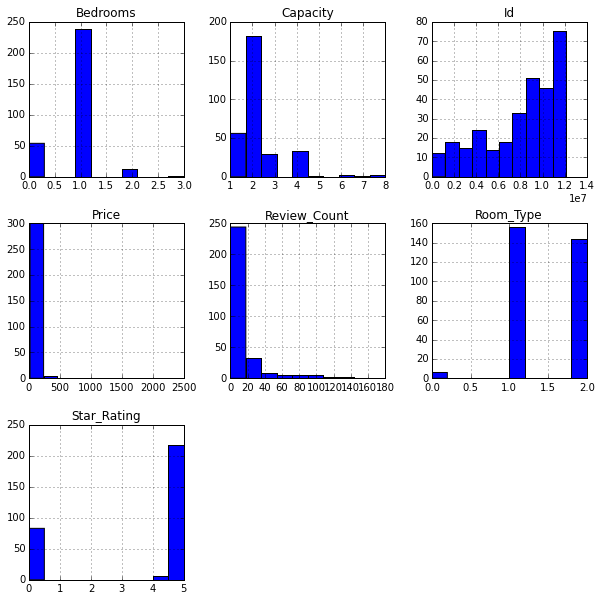

In [82]:
ny_df.hist(figsize=(10,10))

### Thoughts on the histograms

* Bedrooms: discrete as expected, and the distribution is fairly normal. I'd be curious to check what the other feature values are for 0 bedrooms (I expect it to be Shared room). 
* Capacity: skewed left, could take log of capacity. Most common value is 2 (makes sense).
* Price: histogram isn't great because of outlier, will remake histogram
* Review Count: heavily skewed left, also could take log. Smooth exponentially decreasing distribution.
* Room type (Shared Room = 0, Private Room = 1, Entire home/apt = 2): split almost evenly between 1 & 2. Thought ordering the mapping this way made sense in terms of desireability.
* Star Rating: Interesting that this should be continuous variable essentially takes on two values. Will map to {0 = 0, >4 = 1}

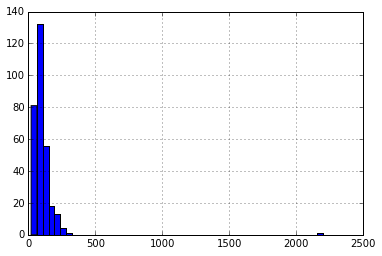

In [85]:
ny_df.Price.hist(bins=50)

#### Removing price outlier

In [86]:
ny_df_nooutlier = ny_df[ny_df.Price<2000]

In [91]:
ny_df.shape

(306, 8)

In [92]:
ny_df_nooutlier.shape

(305, 8)

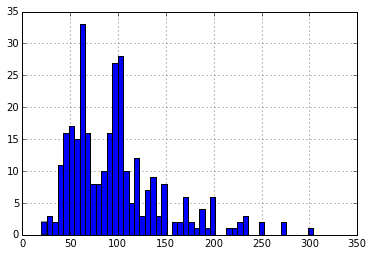

In [94]:
ny_df_nooutlier.Price.hist(bins=50)

In [95]:
outlier = ny_df[ny_df.Price>2000]

In [96]:
outlier

,Bedrooms,Capacity,Id,Price,Property_Type,Review_Count,Room_Type,Star_Rating
1,2,7,12022627,2200,Apartment,0,2,0


### Explore feature relationships

In [103]:
ny_df_nooutlier.drop('Id', 1, inplace=True)

/Users/paulsingman/pyth/data-analysis/venv/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12105eb90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1225934d0>]], dtype=object)

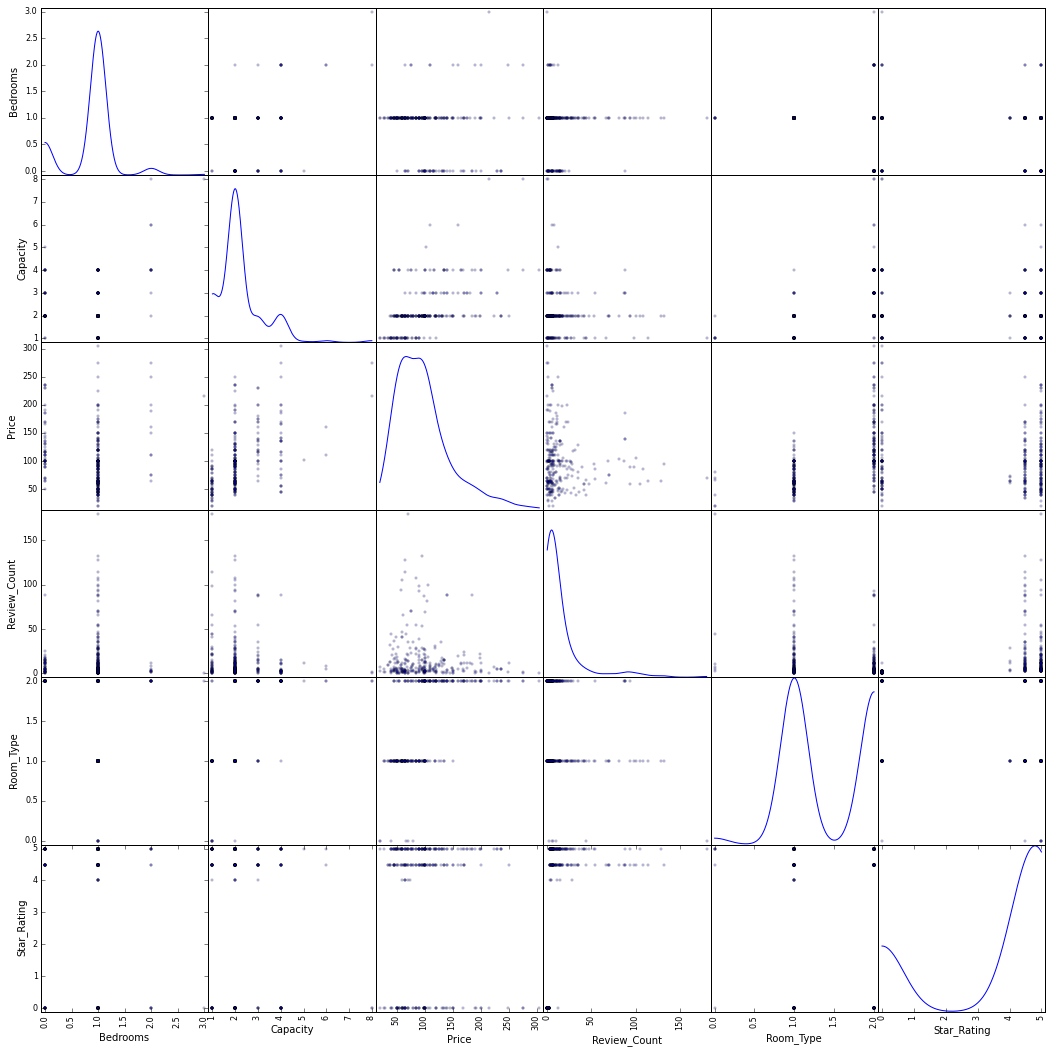

In [104]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(ny_df_nooutlier, alpha=0.2, figsize=(18, 18), diagonal='kde')

From the Scatter Matrix, the relationship between Price and Capacity, and Price and Room Type can be seen. Overall there is not too much corelation between variables. 

In [26]:
# check collinearity of feature variables
ny_df[['Bedrooms', 'Capacity', 'Price','Review_Count','Room_Type','Star_Rating']].corr()

,Bedrooms,Capacity,Price,Review_Count,Room_Type,Star_Rating
Bedrooms,1.000000,0.207166,0.089616,0.032866,-0.291271,-0.063384
Capacity,0.207166,1.000000,0.423576,-0.113807,0.513720,-0.110841
Price,0.089616,0.423576,1.000000,-0.060766,0.279877,-0.095937
Review_Count,0.032866,-0.113807,-0.060766,1.000000,-0.196058,0.321183
Room_Type,-0.291271,0.513720,0.279877,-0.196058,1.000000,-0.032722
Star_Rating,-0.063384,-0.110841,-0.095937,0.321183,-0.032722,1.000000


In [40]:
# in plot form:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
def plot_corr(df,cols,size=7.5):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr_df = df[cols]
    corr = corr_df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

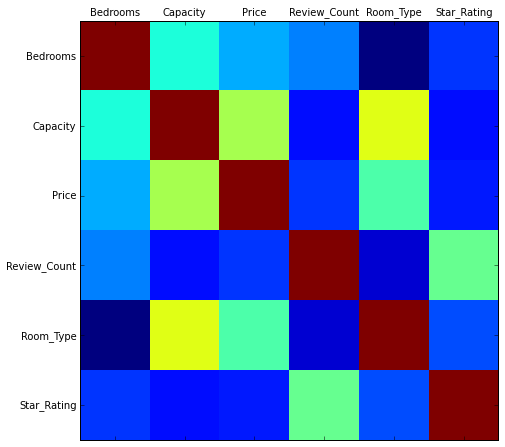

In [27]:
cols = ['Bedrooms', 'Capacity', 'Price','Review_Count','Room_Type','Star_Rating']
plot_corr(ny_df, cols)

### Colinearity of the feature variables

None of the feature variables are alarmingly correlated. Capacity and Room Type are the most correlated. Star_Rating and Review_Count are the second most. Note that Room Type correlates the most to Price, so I expect it to be an important feature in the model. 

## Use PCA and K Means to cluster the data points

In [46]:
pca_cols = ['Bedrooms','Capacity','Review_Count','Room_Type','Star_Rating']
pca_df = ny_df[pca_cols]

In [47]:
# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(pca_df)

In [48]:
data_scaled[:5]

array([[ 0.28412416, -0.20761749,  0.09731192,  1.02515284,  0.7081031 ],
       [ 2.45767399,  4.53349827, -0.59235647,  1.02515284, -1.62932461],
       [ 0.28412416, -0.20761749, -0.3489441 ,  1.02515284,  0.7081031 ],
       [ 0.28412416,  1.68882882, -0.59235647,  1.02515284, -1.62932461],
       [ 0.28412416, -0.20761749, -0.47065028, -0.84208983,  0.7081031 ]])

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(data_scaled)

PCA(copy=True, n_components=5, whiten=False)

In [50]:
pca.components_

array([[-0.08050433,  0.57024628, -0.4337268 ,  0.61285296, -0.32346644],
       [ 0.66774355,  0.03616082, -0.28976996, -0.43158032, -0.53158512],
       [-0.55720941, -0.54800806, -0.47153896, -0.10531109, -0.39467129],
       [-0.20761009,  0.08129093,  0.70457717,  0.0408059 , -0.672455  ],
       [ 0.44051485, -0.60546719,  0.0955848 ,  0.65222246, -0.06946624]])

In [51]:
pca.explained_variance_ratio_

array([ 0.33445812,  0.24713447,  0.2263227 ,  0.13185806,  0.06022665])

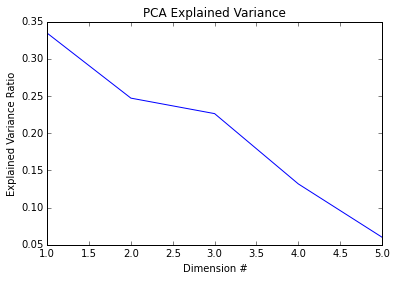

In [52]:
# plot variance explained by each dimension
X = np.linspace(1,5,5)
y = pca.explained_variance_ratio_
plt.plot(X,y)
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Dimension #")
plt.title("PCA Explained Variance")

In [42]:
pca.explained_variance_

array([  6.08100187e+02,   4.11147298e+00,   1.18057326e+00,
         2.92462522e-01,   1.00955938e-01])

## Let's try some clustering

Using capacity and Star Rating

In [59]:
cluster_data_cols = ['Capacity','Star_Rating']
cluster_data = ny_df[cluster_data_cols]

In [60]:
cluster_data.head()

,Capacity,Star_Rating
0,2,5
1,7,0
2,2,5
3,4,0
4,2,5


In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

/Users/paulsingman/pyth/data-analysis/venv/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


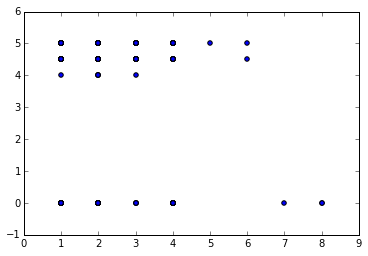

In [67]:
x = cluster_data.Capacity
y = cluster_data.Star_Rating
plt.scatter(x,y)

In [68]:
cluster_data.Star_Rating.unique()

array([ 5. ,  0. ,  4.5,  4. ])

In [71]:
cluster_data.Star_Rating.value_counts()

5.0    132
4.5     85
0.0     83
4.0      6
dtype: int64

In [72]:
cluster_data.Capacity.value_counts()

2    182
1     56
4     33
3     29
8      2
6      2
7      1
5      1
dtype: int64

## Histograms of the features

In [73]:
ny_df.head()

,Bedrooms,Capacity,Id,Price,Property_Type,Review_Count,Room_Type,Star_Rating
0,1,2,6882689,198,Apartment,17,2,5
1,2,7,12022627,2200,Apartment,0,2,0
2,1,2,8940740,149,Apartment,6,2,5
3,1,4,12035970,55,Apartment,0,2,0
4,1,2,11642165,65,Apartment,3,1,5


In [105]:
def save_df(df, name):
    basepath = 'data/'
    filepath = basepath + name
    df.to_csv(filepath)
    return None

In [106]:
# save processed ny_df
save_df(ny_df, 'processed_ny_df.csv')

## Exploring SF Dataset

In [118]:
sf_df = load_df('SF_df.csv')

In [119]:
sf_df.head()

,Bedrooms,Capacity,Id,Price,Property_Type,Review_Count,Room_Type,Star_Rating
0,1,2,1692470,108,Apartment,186,Private room,5.0
1,1,1,7246789,140,Apartment,7,Private room,5.0
2,1,1,1093088,68,Apartment,106,Private room,5.0
3,1,3,3667551,110,Apartment,23,Private room,4.5
4,1,3,9347891,130,House,25,Entire home/apt,5.0


In [109]:
sf_df.Property_Type.value_counts()

Apartment          182
House               96
Condominium         12
Loft                10
Townhouse            3
Other                1
Bungalow             1
Bed & Breakfast      1
dtype: int64

In [120]:
sf_df.Room_Type.value_counts()

Private room       177
Entire home/apt    109
Shared room         20
dtype: int64

In [111]:
sf_df = preprocess_data(sf_df)

In [112]:
sf_df.describe()

,Bedrooms,Capacity,Id,Price,Review_Count,Room_Type,Star_Rating
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,1.003268,2.261438,6713958.526144,123.065359,37.212418,1.290850,4.199346
std,0.521652,1.166591,3741682.785790,60.671994,54.148405,0.581446,1.651963
min,0.000000,1.000000,51073.000000,39.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,3073038.000000,80.750000,5.000000,1.000000,4.500000
50%,1.000000,2.000000,7801036.500000,104.000000,14.000000,1.000000,5.000000
75%,1.000000,2.000000,9977020.500000,150.000000,41.750000,2.000000,5.000000
max,3.000000,11.000000,12041358.000000,375.000000,281.000000,2.000000,5.000000


In [113]:
sf_df.head()

,Bedrooms,Capacity,Id,Price,Property_Type,Review_Count,Room_Type,Star_Rating
0,1,2,1692470,108,Apartment,186,1,5.0
1,1,1,7246789,140,Apartment,7,1,5.0
2,1,1,1093088,68,Apartment,106,1,5.0
3,1,3,3667551,110,Apartment,23,1,4.5
4,1,3,9347891,130,House,25,2,5.0


In [115]:
feature_cols = ['Bedrooms','Capacity','Price','Review_Count','Room_Type','Star_Rating']
sf_df_explore = sf_df[feature_cols]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12346e450>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x123988d90>]], dtype=object)

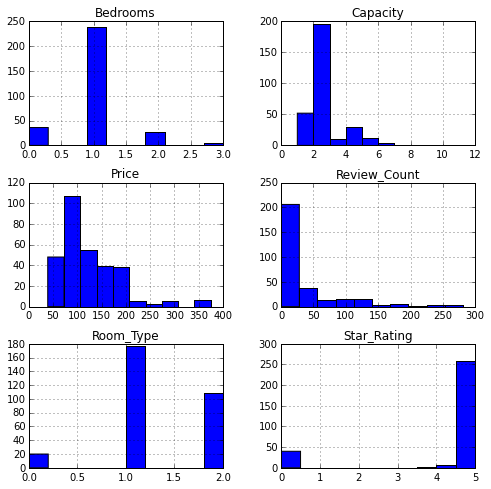

In [117]:
sf_df_explore.hist(figsize=(8,8))

Looks like features in SF exhibit same distributions as in NY

## Exploring LA data

In [121]:
la_df = load_df('LA_df.csv')

In [122]:
la_df.head()

,Bedrooms,Capacity,Id,Price,Property_Type,Review_Count,Room_Type,Star_Rating
0,2,4,12038456,250,Apartment,0,Entire home/apt,0.0
1,1,2,10814985,42,Apartment,3,Private room,5.0
2,1,3,8226591,65,Apartment,7,Entire home/apt,4.5
3,2,4,9463896,140,House,9,Entire home/apt,4.5
4,0,2,12020409,169,House,2,Entire home/apt,0.0


In [123]:
la_df.Property_Type.value_counts()

Apartment          157
House              115
Loft                12
Townhouse            7
Condominium          6
Cabin                3
Bed & Breakfast      3
Other                2
Villa                1
dtype: int64

In [125]:
la_df.Room_Type.value_counts()

Private room       150
Entire home/apt    139
Shared room         17
dtype: int64

In [126]:
la_df = preprocess_data(la_df)

In [127]:
la_df.describe()

,Bedrooms,Capacity,Id,Price,Review_Count,Room_Type,Star_Rating
count,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000
mean,0.866013,2.225490,7606586.568627,83.980392,35.352941,1.398693,4.109477
std,0.516947,1.088601,3656906.860016,37.416744,55.504538,0.593294,1.748613
min,0.000000,1.000000,8223.000000,25.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,4455821.500000,59.250000,5.000000,1.000000,4.500000
50%,1.000000,2.000000,8527063.500000,76.000000,13.500000,1.000000,5.000000
75%,1.000000,2.000000,10831249.500000,99.000000,37.000000,2.000000,5.000000
max,2.000000,13.000000,12107071.000000,250.000000,335.000000,2.000000,5.000000


In [128]:
la_df_explore = la_df[feature_cols]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123691750>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x123fb42d0>]], dtype=object)

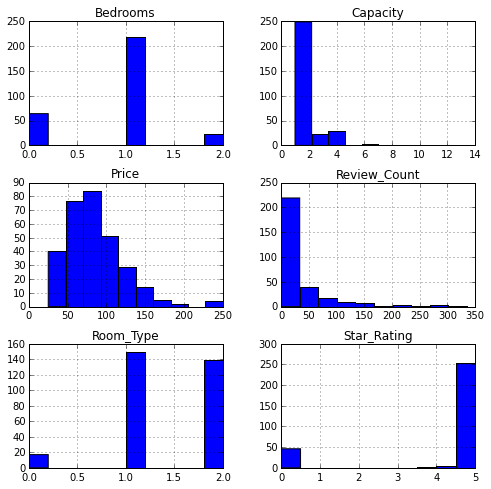

In [129]:
la_df_explore.hist(figsize=(8,8))

Again, the feature distributions are similar to those observed in LA, which makes me confident in combining the datasets from each city when building the predictive model.

In [130]:
# save processed la and sf dataframes
save_df(sf_df, 'processed_sf_df.csv')
save_df(la_df, 'processed_la_df.csv')